In [1]:


import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/heart-disease-data/heart_disease_uci.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* # The following functions could be used in any project and thus are extendable

In [3]:
def dataset_overview(df):
    """
  
     Number of rows and columns
     Missing values
    """
    print("                          Dataset Overview:")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("   ")
    print("                          Missing Values:")
    print(df.isnull().sum())
    print("-" * 50)

In [4]:
def analyze_target_variable(df, target_col):
    """
    it will analyze the distribution of the target variable
    
    """
    print(f"Target Variable Analysis ({target_col}):")
    print(df[target_col].value_counts())
    sns.countplot(data=df, x=target_col)
    plt.title(f"Distribution of {target_col}")
    plt.show()

In [5]:
def Histogram(df, age_col,title):
    """
    
    """
    print("Demographic Insights:")
    print(f"            Range: {df[age_col].min()} - {df[age_col].max()}")
    sns.histplot(df[age_col], kde=True, bins=20)
    plt.title(title)
    plt.show()

  

In [6]:
def metrics_summary(df, metric_cols):
    """
    Provides average and median values for selected health metrics.
    """
    print("                   Metrics Summary:")
    for col in metric_cols:
        print(f"{col} - Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f}")
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

In [7]:
def distribution_plot(df, Dict):
    """
    Analyzes the counts of categorical features with customizable labels.
    
    Parameters:
    - df (DataFrame): The input DataFrame.
    - labels_dict (dict): A dictionary mapping column names to their corresponding labels.
                          Format: {'column_name': ['Label1', 'Label2', ...]}
    """
    for col, labels in Dict.items():
        print(f" Feature Analysis: {col}")
        counts = df[col].value_counts()
        print(counts)
        
        # Ensure the number of labels matches the unique values in the column
        if len(labels) != len(counts):
            raise ValueError(f"Mismatch between labels provided and unique values in column '{col}'.")
        
        plt.figure(figsize=(5, 5))
        counts.plot.pie(autopct="%1.1f%%", colors=['pink', 'green', 'blue', 'yellow'][:len(counts)], labels=labels)
        plt.title(f"Distribution of {col}", fontsize=15)
        plt.show()


In [8]:
def compare_groups(df, compare_col, target_col):
    """
    Compare groups based on a numeric column and target column and visualize using a boxplot.
    
    Parameters:
    - df: DataFrame containing the data.
    - compare_col: Numeric column to compare (e.g., cholesterol levels).
    - target_col: Target column (e.g., severity levels of heart disease).
    """
  
    avg_chol_per_class = df.groupby(target_col)[compare_col].mean()

 
    print("Average Levels of", compare_col.capitalize(), "by", target_col.capitalize() + ":")
    for class_label, avg_value in avg_chol_per_class.items():
        print(f"Class {class_label}: {avg_value:.2f}")

 
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=target_col, y=compare_col, data=df, palette='Set2')
    
   
    plt.title(f"Distribution of {compare_col.capitalize()} by {target_col.capitalize()}", fontsize=14)
    plt.xlabel(target_col.capitalize(), fontsize=12)
    plt.ylabel(compare_col.capitalize(), fontsize=12)
    
  
    plt.xticks([0, 1, 2, 3, 4], ['No Heart Disease', 'Mild', 'Moderate', 'Severe', 'Very Severe'])

    plt.show()

In [9]:
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')

In [10]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [11]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

# 1. General Information
# ● How many rows and columns are in the dataset?
# ● Are there any missing values in the dataset?

In [12]:
dataset_overview(df)

                          Dataset Overview:
Rows: 920, Columns: 16
   
                          Missing Values:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
--------------------------------------------------


# 2. Target Variable Analysis
# ● What is the distribution of the target variable (presence of heart disease: 0 or 1)?

 Feature Analysis: num
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


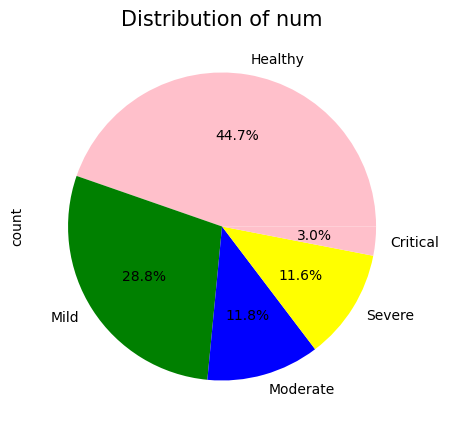

In [13]:
 ddict = {
    'num': ['Healthy','Mild','Moderate','Severe','Critical']
}

distribution_plot(df,ddict)

# How many patients have heart disease, and how many don’t?

0    411
1    509
dtype: int64


<Axes: >

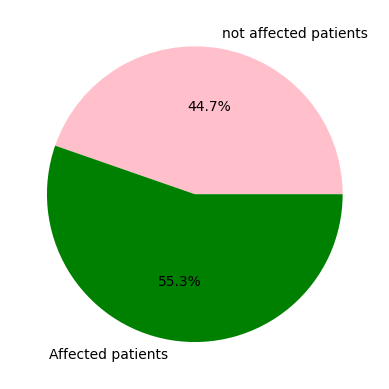

In [14]:
x= df['num'].value_counts()
affected = sum(x[1:])
x=pd.Series([x[0],affected])

print(x)
x.plot.pie(autopct="%1.1f%%", colors=['pink', 'green', 'blue', 'yellow'][:len(x)], labels=['not affected patients','Affected patients'])


# 3. Demographic Insights
# ● What is the age range of patients in the dataset?


Demographic Insights:
            Range: 28 - 77


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


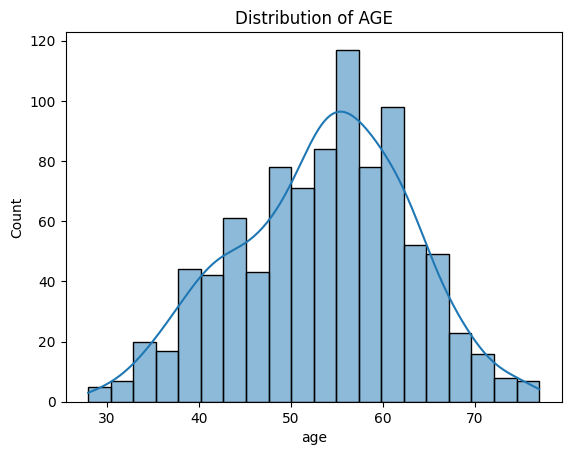

In [15]:
Histogram(df,'age','Distribution of AGE');

# What is the gender distribution of the patients?

 Feature Analysis: sex
sex
Male      726
Female    194
Name: count, dtype: int64


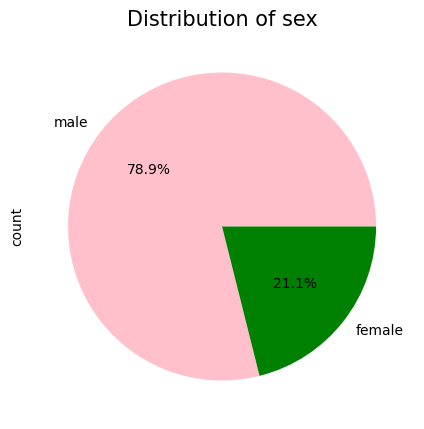

In [16]:
 ddict = {
    'sex': ['male', 'female']
}

distribution_plot(df,ddict)

# 4. Health Metrics
# ● What are the average and median values of:
# ● Resting blood pressure (trestbps)?
# ● Serum cholesterol (chol)?
# ● Maximum heart rate (thalach)?

                   Metrics Summary:
trestbps - Mean: 132.13, Median: 130.00


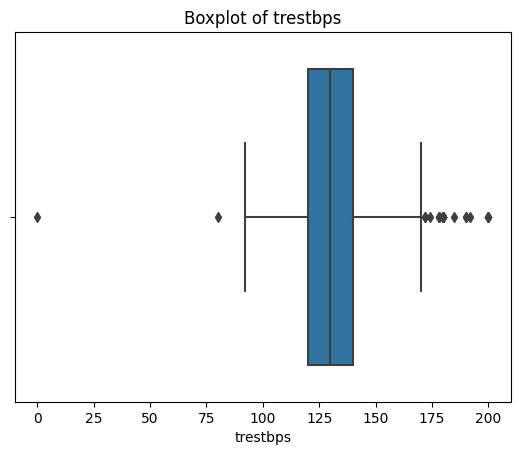

chol - Mean: 199.13, Median: 223.00


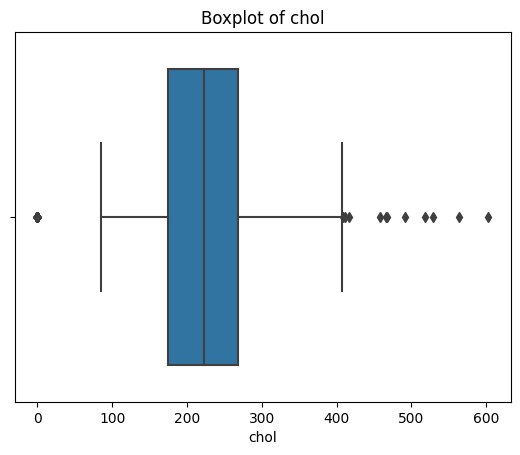

thalch - Mean: 137.55, Median: 140.00


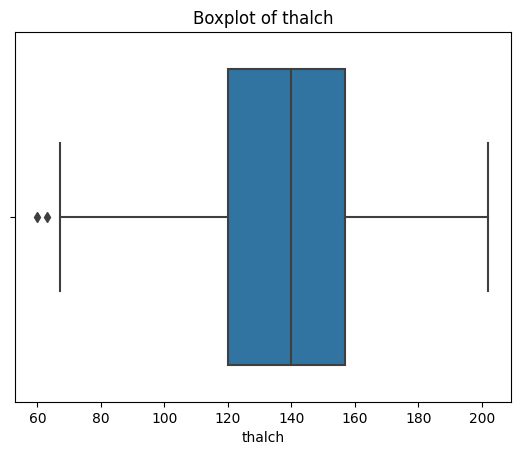

In [17]:
metrics_summary(df,['trestbps','chol','thalch'])

# ● Are there any outliers in cholesterol (chol) or resting blood pressure (trestbps)

* AS we can see that we had outliers in chol after scale 400 & before 90  and thus in trestbs*

# ● How many patients have exercise-induced angina (exang)?
# ● What are the counts of different chest pain types (cp)?

 Feature Analysis: exang
exang
False    528
True     337
Name: count, dtype: int64


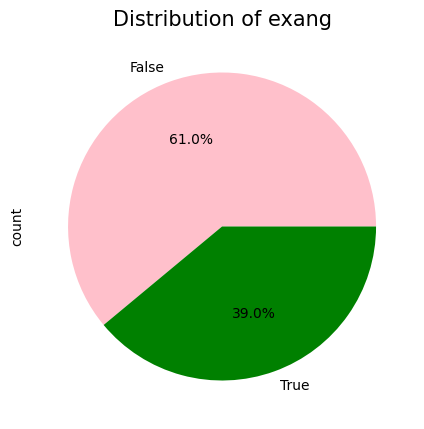

 Feature Analysis: cp
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


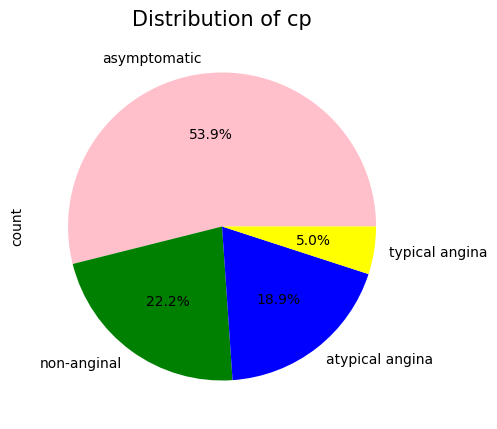

In [18]:
ddict = {
    'exang': ['False', 'True'],
    'cp': ['asymptomatic', 'non-anginal','atypical angina','typical angina']
}

distribution_plot(df,ddict)

# Compare the average cholesterol levels between patients with and without heart
# disease

Average Levels of Chol by Num:
Class 0: 227.91
Class 1: 195.26
Class 2: 143.86
Class 3: 159.72
Class 4: 192.15


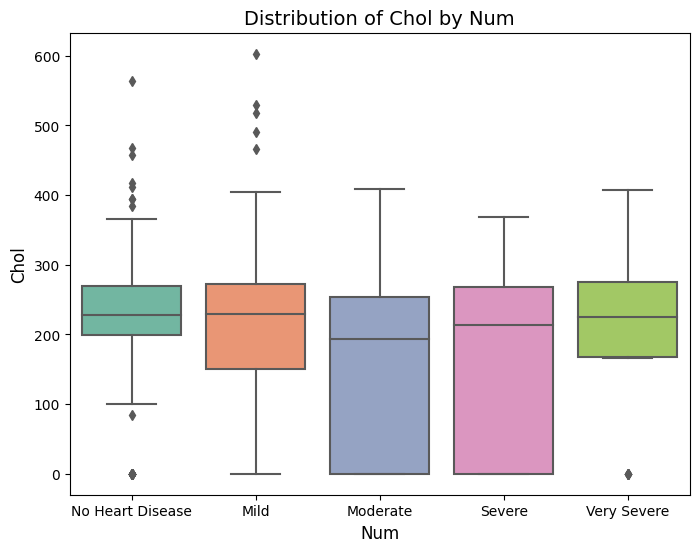

In [19]:
compare_groups(df, 'chol', 'num')